## Box Office Revenue Prediction

#### When a movie is produced then the director would certainly like to maximize his/her movie’s revenue. But can we predict what will be the revenue of a movie by using its genre or budget information? This is exactly what we’ll learn in this article, we will learn how to implement a machine learning algorithm that can predict a box office revenue by using the genre of the movie and other related features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\proj file\boxoffice.csv', encoding='unicode_escape')

In [3]:
df.shape

(2694, 10)

In [4]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [10]:
# We will be predicting only
# domestic_revenue in this article.

to_remove = ['world_revenue', 'opening_revenue']
df.drop(to_remove, axis=1, inplace=True)

#### checking what is the percentage of entries in each column that is null.

In [11]:
df.isnull().sum() * 100 / df.shape[0]

title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [12]:
# Handling the null value columns
df.drop('budget', axis=1, inplace=True)

for col in ['MPAA', 'genres']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(inplace=True)

df.isnull().sum().sum()

0

In [13]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '') 

    # Selecting rows with no null values 
    # in the columns on which we are iterating. 
    temp = (~df[col].isnull()) 
    df[temp][col] = df[temp][col].convert_dtypes(float) 

    df[col] = pd.to_numeric(df[col], errors='coerce')

### Exploratory Data Analysis
#### EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [20]:
print(df['MPAA'].dtype)
print(df['MPAA'].unique())


object
['R' 'G' 'NC-17' 'PG-13' 'PG']


In [21]:
df['MPAA'] = df['MPAA'].astype('category')

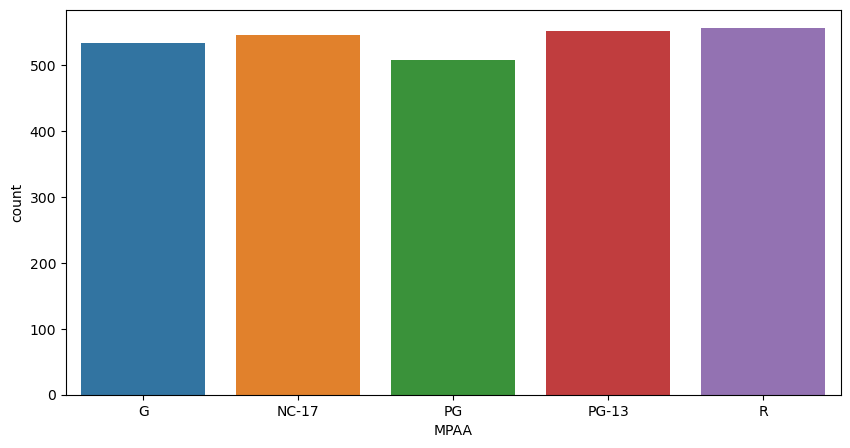

In [22]:
plt.figure(figsize=(10, 5))
sb.countplot(x='MPAA', data=df)
plt.show()

In [23]:
df.groupby('MPAA')['domestic_revenue'].mean()

MPAA
G        3.426099e+07
NC-17    3.452006e+07
PG       3.697347e+07
PG-13    3.510989e+07
R        3.670206e+07
Name: domestic_revenue, dtype: float64

C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\971158204.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\971158204.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\971158204.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histp

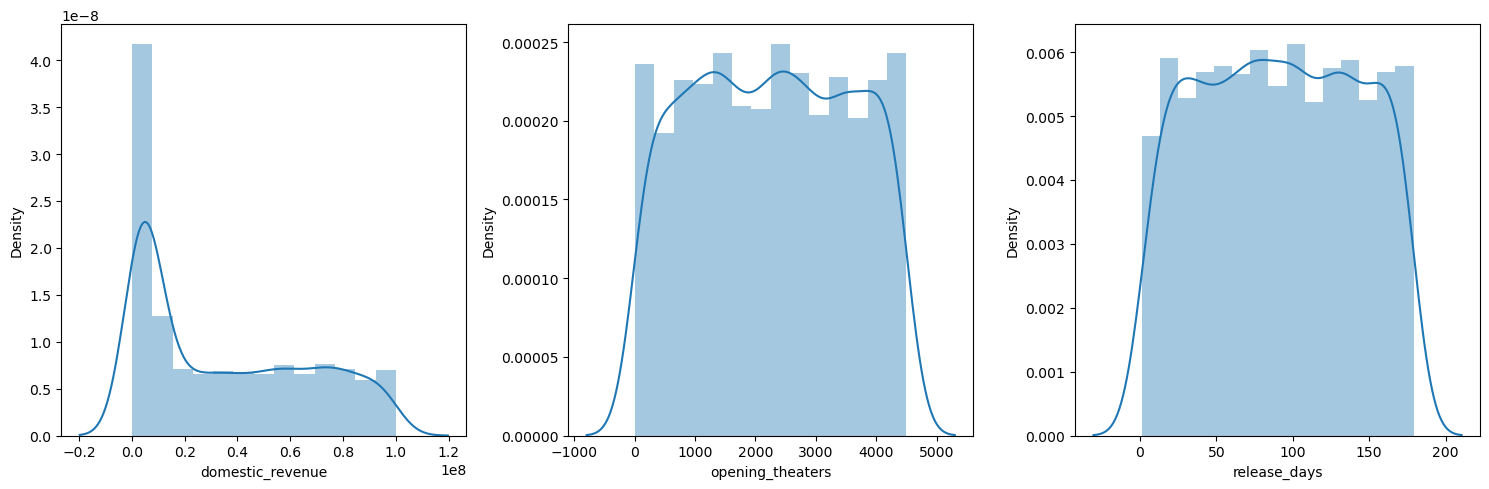

In [24]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\1587395939.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


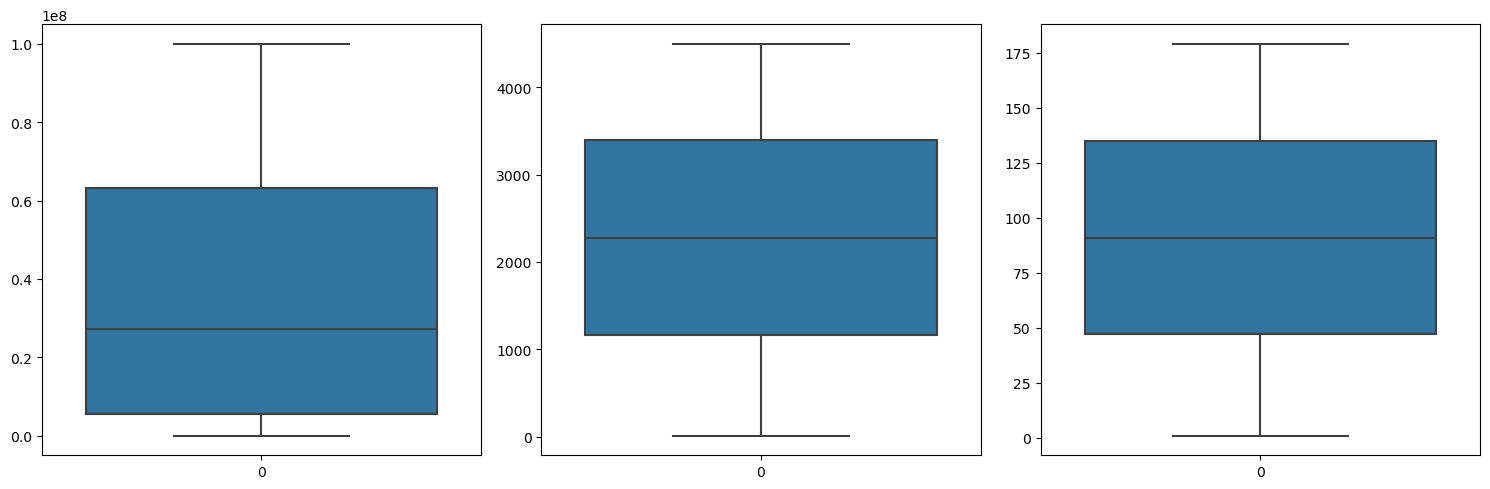

In [25]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [26]:
for col in features:
  df[col] = df[col].apply(lambda x: np.log10(x))

C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\1761003163.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\1761003163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\HomePC\AppData\Local\Temp\ipykernel_7688\1761003163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hi

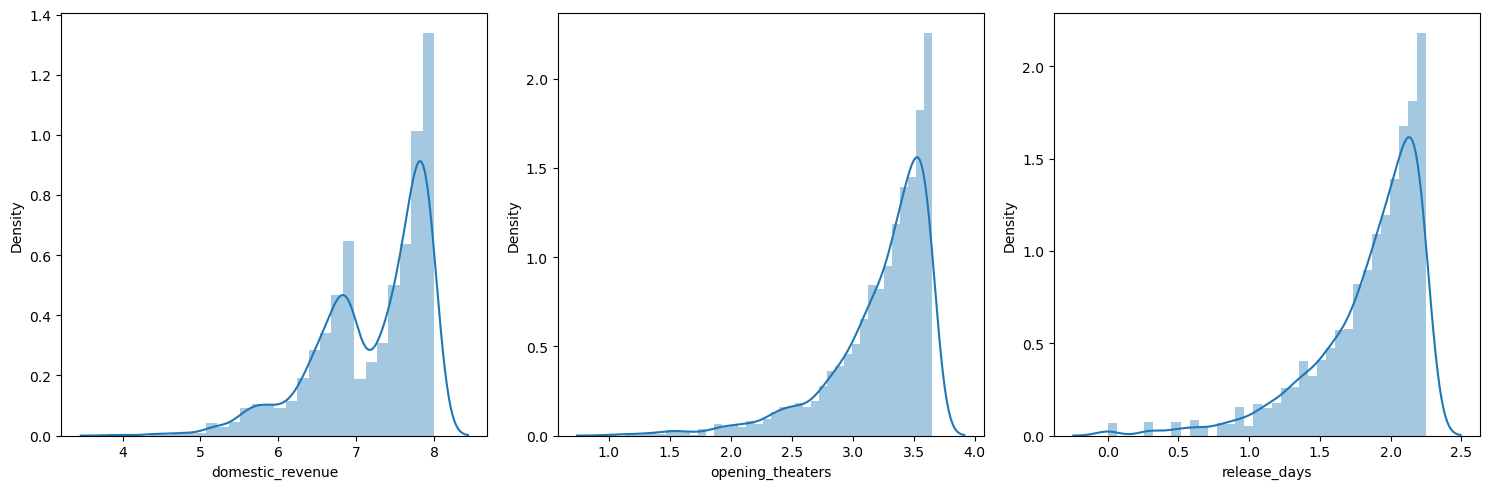

In [27]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [28]:
vectorizer = CountVectorizer() 
vectorizer.fit(df['genres']) 
features = vectorizer.transform(df['genres']).toarray() 

genres = vectorizer.get_feature_names_out() 
for i, name in enumerate(genres): 
    df[name] = features[:, i] 

df.drop('genres', axis=1, inplace=True)

NameError: name 'CountVectorizer' is not defined

In [29]:
removed = 0
# Check if 'action' and 'western' columns exist before slicing
if 'action' in df.columns and 'western' in df.columns:
    for col in df.loc[:, 'action':'western'].columns: 

        # Removing columns having more 
        # than 95% of the values as zero. 
        if (df[col] == 0).mean() > 0.95: 
            removed += 1
            df.drop(col, axis=1, inplace=True) 

print(removed) 
print(df.shape)

0
(2694, 7)


In [30]:
for col in ['distributor', 'MPAA']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

NameError: name 'LabelEncoder' is not defined

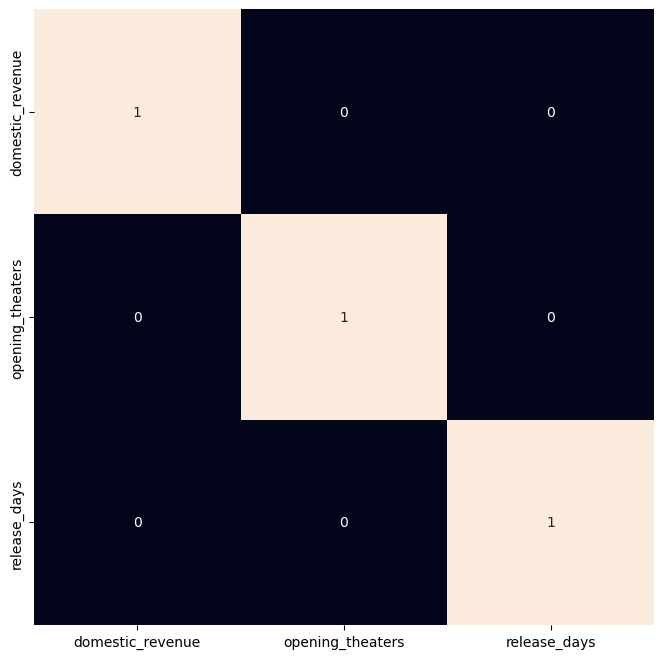

In [31]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.select_dtypes(include=np.number).corr() > 0.8, 
            annot=True, 
            cbar=False) 
plt.show()

### Model Development
#### Now we will separate the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
features = df.drop(['title', 'domestic_revenue'], axis=1) 
target = df['domestic_revenue'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, target, 
                                    test_size=0.1, 
                                    random_state=22) 
X_train.shape, X_val.shape

((2424, 5), (270, 5))

In [41]:
from sklearn.preprocessing import StandardScaler
print(X_train.dtypes)
import pandas as pd

# One-hot encoding categorical columns
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# Align the columns of training and validation data
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

distributor           object
opening_theaters     float64
MPAA                category
genres                object
release_days         float64
dtype: object


In [45]:
pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 130.7 kB/s eta 0:15:56
   ---------------------------------------- 0.0/124.9 MB 130.7 kB/s eta 0:15:56
   ---------------------------------------- 0.0/124.9 MB 130.7 kB/s eta 0:15:56
   ---------------------------

   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 226.0 kB/s eta 0:06:42
   ---------- ---------------------------- 34.3/124.9 MB 209.9 kB/s eta 0:07:12
   ---------- ---------------------------- 34.3/124.9 MB 209.9 kB/s eta 0:07:12
   ---------- ---------------------------- 34.3/124.9 MB 209.9 kB/s eta 0:07:12
   ---------- ---------------------------- 34.3/124.9 MB 200.4 kB/s eta 0:07:33
   ---------- ---------------------------- 34.3/124.9 MB 200.4 kB/s eta 0:07:33
   ---------- --------------------------

In [49]:
from xgboost import XGBRegressor

In [50]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
train_preds = model.predict(X_train) 
print('Training Error : ', mae(Y_train, train_preds)) 

val_preds = model.predict(X_val) 
print('Validation Error : ', mae(Y_val, val_preds)) 
print() 

Training Error :  0.19294531432180212
Validation Error :  0.6262267533592569



#### This mean absolute error value we are looking at is between the logarithm of the predicted values and the actual values so, the actual error will be higher than what we are observing above.